<a href="https://colab.research.google.com/github/priyanshgupta1998/DATA_CM/blob/master/Categorical_with_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handling Categorical Data in Python



```
 how you can deal with categorical features in big data with Spark:  'PySpark ' module
```



Also make sure that you set Matplotlib to plot inline, which means that the outputted plot will appear immediately under each code cell.

In [0]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [410]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [412]:
print(len(df_flights))
print(df_flights.shape)
print(df_flights.ndim)

162049
(162049, 16)
2


Note if you are reading the **RDS file** formats you can do so by installing **rpy2** library. 

In [413]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None




```
You can plot a boxplot by invoking .boxplot() on your DataFrame. Here, i will plot a boxplot of the dep_time column with respect to the two origin of the flights from **PDX** and **SEA**.
```



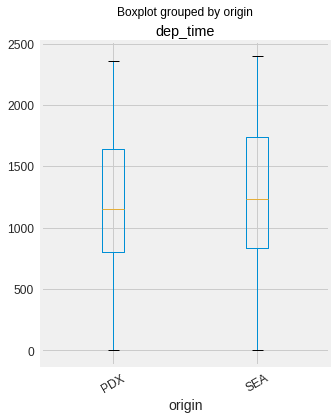

In [434]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

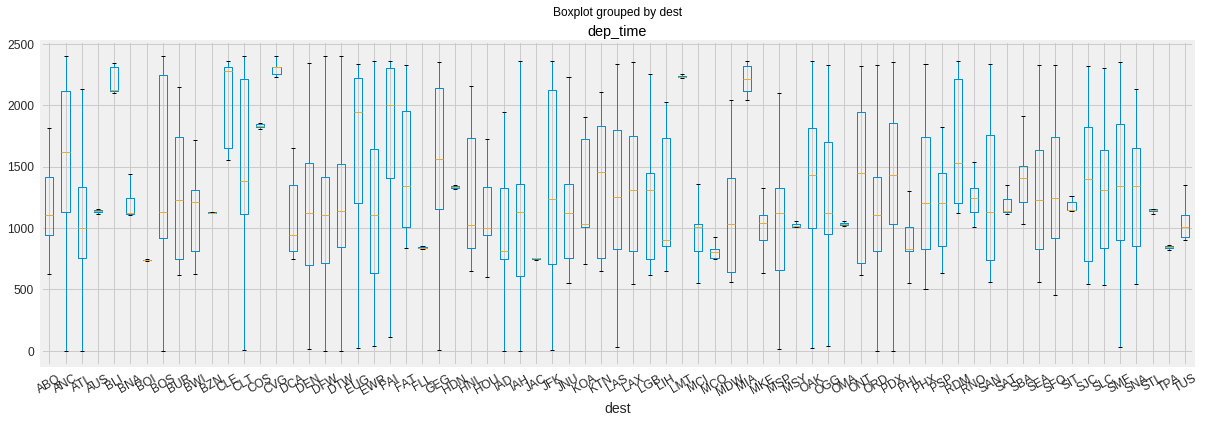

In [430]:
df_flights.boxplot('dep_time','dest',rot = 30,figsize=(20,6))   # with destination 

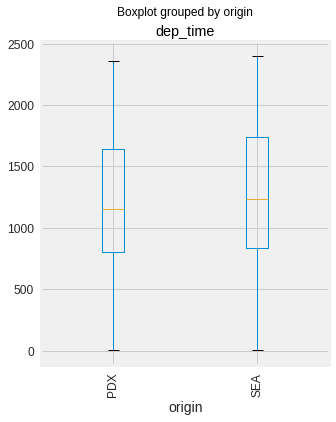

In [421]:
df_flights.boxplot('dep_time','origin',rot = 90,figsize=(5,6))  # here 'rot' is angle of origin keyword.

As you will only be dealing with categorical features in this tutorial, it's better to filter them out. You can create a separate DataFrame consisting of only these features by running the following command. The **method .copy()** is used here so that any changes made in new DataFrame don't get reflected in the original one.

In [0]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()



```
Again, use the .head() method to check if you have filtered the required columns.
```



In [424]:
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC




```
One of the most common data pre-processing steps is to check for null values in the dataset.

You can get the total number of missing values in the DataFrame by the following one liner code:
```



In [425]:
cat_df_flights.isnull().values.sum()

248



```
Let's also check the column-wise distribution of null values:
```



In [426]:
cat_df_flights.isnull().sum()

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64

It seems that only the tailnum column has null values. 

The function fillna() is handy for such operations.



```
.value_counts() in the code below , returns the frequency distribution of each category in the feature,

means , how many times 'tailnum's fearture is being repeated.
```



In [437]:
print(len(cat_df_flights['tailnum'].value_counts()))
print(cat_df_flights['tailnum'].value_counts()[:10])

3022
N223AG    755
N218AG    749
N219AG    744
N614AS    738
N611AS    723
N224AG    713
N607AS    708
N619AS    696
N613AS    694
N644AS    691
Name: tailnum, dtype: int64


In [438]:
cat_df_flights['tailnum'].value_counts().index[0]

'N223AG'



```
Now i am gonna fill all the null slots with 'N223AG' in tailnum feature.
```



In [440]:
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])
cat_df_flights.head()  

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [441]:
print(len(cat_df_flights['tailnum'].value_counts()))
print(cat_df_flights['tailnum'].value_counts()[:10])    #755+248

3022
N223AG    1003
N218AG     749
N219AG     744
N614AS     738
N611AS     723
N224AG     713
N607AS     708
N619AS     696
N613AS     694
N644AS     691
Name: tailnum, dtype: int64




```
Let's check the number of null values after imputation
```



In [442]:
print(cat_df_flights.isnull().values.sum())

0


#To check the frequency distribution of categories within the feature

In [521]:
print(cat_df_flights['carrier'].value_counts())  # No. of frequencies of a perticular category
print(cat_df_flights['carrier'].value_counts().sum()) # total no. of categorical variables in a feature 'carrier'

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64
162049




```
To know the count of distinct categories within the feature you can chain the previous code with the .count() method:
```



In [444]:
cat_df_flights['carrier'].value_counts().count()

11

In [445]:
cat_df_flights['carrier'].value_counts().values

array([62460, 23355, 18710, 16716, 16671,  7586,  5946,  3540,  3272,
        2698,  1095])



```
Below is a basic template to plot a barplot of the frequency distribution of a categorical feature using the seaborn package, which shows the frequency distribution of the carrier column.
```



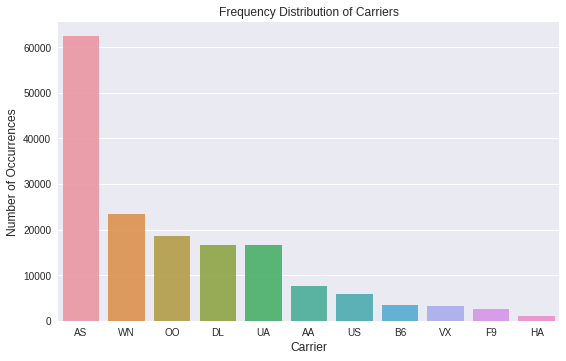

In [450]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

In [456]:
cat_df_flights['carrier'].astype('category')[:5]

0    AS
1    US
2    UA
3    US
4    AS
Name: carrier, dtype: category
Categories (11, object): [AA, AS, B6, DL, ..., UA, US, VX, WN]

In [459]:
cat_df_flights['carrier'].astype('category').cat

In [460]:
cat_df_flights['carrier'].astype('category').cat.categories

Index(['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'OO', 'UA', 'US', 'VX', 'WN'], dtype='object')

In [461]:
cat_df_flights['carrier'].astype('category').cat.categories.tolist()  # convert it into a list

['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'OO', 'UA', 'US', 'VX', 'WN']

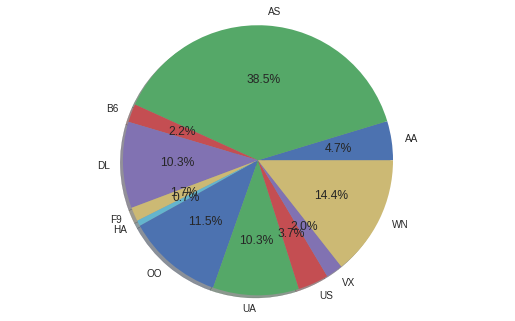

In [465]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
frequency = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(frequency, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

#Encoding Categorical Data



```
 encode the categorical features to numeric quantities.
```



Here we have the several  techniques to convert categorical data into numerical format are  the following:

Replacing values

Encoding labels

One-Hot encoding

Binary encoding

Backward difference encoding

Miscellaneous features

#Replace Values



```
Let's start with the most basic method, which is just replacing the categories with the desired numbers. 

This can be achieved with the help of the replace() function in pandas.

The idea is that you have the liberty to choose whatever numbers you want to assign to the categories.

You will now create a dictionary which contains mapping numbers for each category in the carrier column:
```



In [0]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}



```
Note that defining a mapping via a hard coded dictionary is easy when the number of categories is low, like in this case which is 11.

But if count is high then, we have to think another method .The method is 
 store the category names in a list called **labels** and then **zip** it to a seqeunce of numbers and iterate over it
```



In [468]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
labels

['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'OO', 'UA', 'US', 'VX', 'WN']

In [472]:
k= zip(labels,list(range(1,len(labels)+1)))
print(k)

In [481]:
for k,v in zip(labels,list(range(1,len(labels)+1))):
  print(str(k) +":"+ str(v))

AA:1
AS:2
B6:3
DL:4
F9:5
HA:6
OO:7
UA:8
US:9
VX:10
WN:11


In [482]:
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}




```
Throughout this tutorial, you will be making a copy of the dataset via the .copy() method to practice each encoding technique to ensure that the original DataFrame stays intact and whatever changes you are doing happen only in the copied one.
```



In [0]:
cat_df_flights_replace = cat_df_flights.copy()



```
Use the replace() function on the DataFrame by passing the mapping dictionary as argument:
```



In [484]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

print(cat_df_flights_replace.head())  # Convert categorical data into numerical values.

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


As you can observe, we have encoded the categories with the mapped numbers

In [485]:
print(cat_df_flights_replace['carrier'].dtypes)   # previously the data type of 'carrier' feature was 'Object'

int64


Tip: in Python, it's a good practice to typecast **All categorical features** to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using  ** .astype() ** method on your columns like shown below:

In [0]:
cat_df_flights_lc = cat_df_flights.copy()

In [501]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes)

carrier    category
tailnum      object
origin     category
dest         object
dtype: object




```
You can validate the faster operation of the category dtype by timing the execution time of the same operation done on a DataFrame with columns as category dtype and object dtype by using the time library.
```





```
Let's say you want to calculate the number of flights for each carrier from each origin places, you can use the .groupby() and .count() methods on your DataFrame to do so.
```



In [493]:
import time
%timeit cat_df_flights.groupby(['origin','carrier']).count() #DataFrame with object dtype columns  # more time 

10 loops, best of 3: 32.1 ms per loop


In [494]:
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns    # less time 

10 loops, best of 3: 23.8 ms per loop


Note that the DataFrame with category dtype is much faster.

#Label Encoding

Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. 

Numerical labels are always between 0 and n_categories-1.

You can do label encoding via attributes **.cat.codes** on your DataFrame's column

In [510]:
cat_df_flights_lc['carrier'].value_counts().count()    # Let's calculate the No. of categoracal variable  in a feature.

11

In [504]:
cat_df_flights_lc['carrier'].cat.codes[:5]

0    1
1    8
2    7
3    8
4    1
dtype: int8

In [0]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes

In [512]:
cat_df_flights_lc.head() #alphabetically labeled from 0 to 10

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC




```
Sometimes, you might just want to encode a bunch of categories within a feature to some numeric value and encode all the other categories to some other numeric value.

You could do this by using numpy's where() function like shown below. You will encode all the US carrier flights to value 1 and other carriers to value 0. This will create a new column in your DataFrame with the encodings. Later, if you want to drop the original column, you can do so by using the drop() function in pandas.
```



In [0]:
cat_df_flights_specific = cat_df_flights.copy()

In [530]:
cat_df_flights_specific['carrier'].str.contains('US')[:5]

0    False
1     True
2    False
3     True
4    False
Name: carrier, dtype: bool

In [518]:
cat_df_flights_specific['carrier'].str.contains('US').value_counts()  # how many flights of 'US' == 5946

False    156103
True       5946
Name: carrier, dtype: int64

In [519]:
cat_df_flights_specific['carrier'].str.contains('US').count()  # Total  categories in the single column

162049

In [522]:

cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)     # assign 1 for 'True' and 0 for 'False'

cat_df_flights_specific.head() 

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


**Method 2: using Machine learning**

```
You can achieve the same label encoding using scikit-learn's LabelEncoder
```



In [0]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

In [524]:
lb_make = LabelEncoder()   # make the constructor
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1




```
Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm. Should the carrier US (encoded to 8) be given 8x more weight than the carrier AS (encoded to 1) ?

To solve this issue there is another popular way to encode the categories via something called one-hot encoding.
```



#One-Hot encoding



```
The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column
```





```
There are many libraries out there that support one-hot encoding .

but the simplest one is using pandas' .get_dummies() method
```





```
This function is named this way because it creates dummy/indicator variables (1 or 0). There are mainly three arguments important here, the first one is the DataFrame you want to encode on, second being the columns argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the prefix for the new columns that will be created after encoding.
```



In [525]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

  tailnum origin dest  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0  N508AS    PDX  ANC           0           1           0           0   
1  N195UW    SEA  CLT           0           0           0           0   
2  N37422    PDX  IAH           0           0           0           0   
3  N547UW    PDX  CLT           0           0           0           0   
4  N762AS    SEA  ANC           0           1           0           0   

   carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  carrier_VX  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           1           0           0   
3           0           0           0           0           1           0   
4           0           0           0           0           0           0   

   carrier_WN  
0           0  
1           0  
2           0  
3           0  
4           0  


As you can see, the column carrier_AS gets value 1 at the 0th and 4th observation points as those points had the AS category labeled in the original DataFrame. Likewise for other columns also.



```
scikit-learn also supports one hot encoding via LabelBinarizer and OneHotEncoder in its preprocessing module (check out the details here). Just for the sake of practicing you will do the same encoding via LabelBinarizer:
```



In [0]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

In [527]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


Note that this lb_results_df resulted in a new DataFrame with only the one hot encodings for the feature carrier. This needs to be concatenated back with the original DataFrame, which can be done via pandas' .concat() method. The axis argument is set to 1 as you want to merge on columns.

In [528]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)

print(result_df.head())

  carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0


#Binary Encoding



```
This technique is not as intuitive as the previous ones.

In this technique, first the categories are encoded as ordinal,

then those integers are converted into binary code, 

then the digits from that binary string are split into separate columns.
This encodes the data in fewer dimensions than one-hot.
```





```
You can do binary encoding via a number of ways but the simplest one is using the **category_encoders **library.
```





```
You have to first import the category_encoders library after installing it. Invoke the BinaryEncoder function by specifying the columns you want to encode and then call the .fit_transform() method on it with the DataFrame as the argument.
```



In [532]:
!pip install category_encoders

    100% |████████████████████████████████| 61kB 2.9MB/s 


In [0]:
cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

In [539]:
encoder = ce.BinaryEncoder(cols=['carrier'])
print(encoder)

BinaryEncoder(cols=['carrier'], drop_invariant=False, handle_unknown='impute',
       impute_missing=True, return_df=True, verbose=0)


In [540]:
df_binary = encoder.fit_transform(cat_df_flights_ce)
df_binary.head()

,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N508AS,PDX,ANC
1,0,0,0,1,0,N195UW,SEA,CLT
2,0,0,0,1,1,N37422,PDX,IAH
3,0,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,0,1,N762AS,SEA,ANC


Notice that four new columns are created in place of the carrier column with binary encoding for each category in the feature.



```
Note that category_encoders is a very useful library for encoding categorical columns. Not only does it support one-hot, binary and label encoding, but also other advanced encoding methods like Helmert contrast, polynomial contrast, backward difference, etc.
```



#5. Backward Difference Encoding

This technique falls under the contrast coding system for categorical features.

A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables.

In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. 

This type of coding may be useful for a nominal or an ordinal variable.

The code structure is pretty much the same as any method in the category_encoders library, 

just this time you will call BackwardDifferenceEncoder from it:

In [541]:
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])
df_bd = encoder.fit_transform(cat_df_flights_ce)

df_bd.head()

,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,tailnum,origin,dest
0,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N508AS,PDX,ANC
1,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N195UW,SEA,CLT
2,1,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N37422,PDX,IAH
3,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N547UW,PDX,CLT
4,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N762AS,SEA,ANC


The interesting thing here is that you can see that the results are not the standard 1’s and 0’s 

you saw in the dummy encoding examples but rather regressed continuous values.

#Miscellaneous Features

Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points, for example, the age column might be described in the form of categories like 0-20, 20-40 and so on.

While there can be a lot of ways to deal with such features, the most common ones are either split these ranges into two separate columns or replace them with some measure like the mean of that range.

`While there can be a lot of ways to deal with such features, the most common ones are either split these ranges into two separate columns or replace them with some measure like the mean of that range.`

In [0]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})


In [548]:
print(dummy_df_age['age'].map(lambda x: x.split('-')))

0     [0, 20]
1    [20, 40]
2    [40, 60]
3    [60, 80]
Name: age, dtype: object


In [547]:
print(*dummy_df_age['age'].map(lambda x: x.split('-')))

['0', '20'] ['20', '40'] ['40', '60'] ['60', '80']


In [551]:
print(zip(*dummy_df_age['age'].map(lambda x: x.split('-'))))

In [566]:
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

dummy_df_age.head()

,age,age_mean,start,end
0,0-20,10.0,0,20
1,20-40,30.0,20,40
2,40-60,50.0,40,60
3,60-80,70.0,60,80


`To replace the range with its mean, you will write a split_mean() function which basically takes one range at a time, splits it, then calculates the mean and returns it.

To apply a certain function to all the entities of a column you will use the .apply() method:`

In [564]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

dummy_df_age.head()

,age,age_mean
0,0-20,10.0
1,20-40,30.0
2,40-60,50.0
3,60-80,70.0


#Dealing with Categorical Features in Big Data with Spark



```
Now you will learn how to read a dataset in Spark and encode categorical variables in **Apache Spark's Python API, Pyspark.**

 But before that it's good to brush up on some basic knowledge about Spark.
```





```
Spark is a platform for cluster computing. It lets you spread data and computations over clusters with multiple nodes. Splitting up your data makes it easier to work with very large datasets because each node only works with a small amount of data.

As each node works on its own subset of the total data, it also carries out a part of the total calculations required, so that both data processing and computations are performed in parallel over the nodes in the cluster.

Deciding whether or not Spark is the best solution for your problem takes some experience, but you can consider questions like:

Q. Is my data too big to work with on a single machine?
Q. Can my calculations be easily parallelized?

The first step in using Spark is connecting to a cluster. In practice, the cluster will be hosted on a remote machine that's connected to all other nodes. There will be one computer, called the master that manages splitting up the data and the computations. The master is connected to the rest of the computers in the cluster, which are called slaves. The master sends the slaves data and calculations to run, and they send their results back to the master.

When you're just getting started with Spark, it's simpler to just run a cluster locally.
```



In [570]:
!pip install pyspark



```
The first step in Spark programming is to create a SparkContext. SparkContext is required when you want to execute operations in a cluster. SparkContext tells Spark how and where to access a cluster. You'll start by importing SparkContext.
```



In [0]:
from pyspark import SparkContext

In [0]:
sc = SparkContext()

Note that if you are working on Spark's interactive shell then you don't have to import SparkContext as it will already be in your environment as **sc**.

To start working with Spark DataFrames, you first have to create a **SparkSession** object from your **SparkContext**. You can think of the SparkContext as your connection to the cluster and the SparkSession as your interface with that connection.

Note that if you are working in Spark's interactive shell you'll have a **SparkSession** called **spark** available in your workspace!



In [0]:
from pyspark.sql import SparkSession as spark

Once you've created a **SparkSession**, you can start poking around to see what data is in your cluster.

Your **SparkSession** has an attribute called **catalog** which lists all the data inside the cluster. This attribute has a few methods for extracting different pieces of information.

One of the most useful is the** .listTables()** method, which returns the names of all the tables in your cluster as a list.

